In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/250603_BCTL_temps/T132/T132.1.csv')

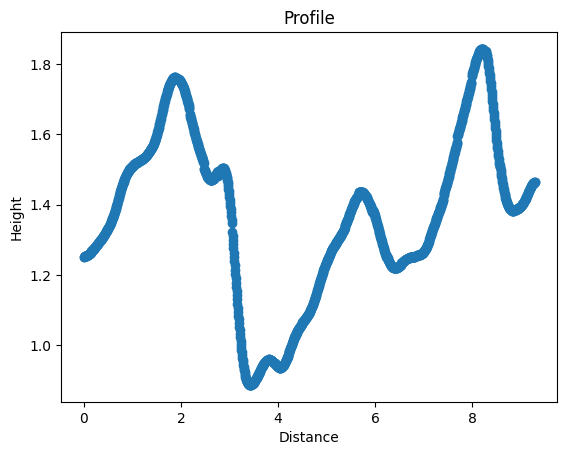

In [10]:
profile = df.iloc[:, :2]

plt.scatter(profile['Distance 1'], df['Height 1'])
plt.title("Profile")
plt.xlabel("Distance")
plt.ylabel("Height")
plt.show()



In [16]:
import pywt

def wavelet_roughness(y, wavelet='db4', level=None):
    coeffs = pywt.wavedec(y, wavelet=wavelet, level=level)
    return [np.sqrt(np.mean(c**2)) for c in coeffs[1:]]  # Exclude approximation


In [13]:
x = df['Distance 1'].values
y = df['Height 1'].values
import numpy as np

dx = np.mean(np.diff(x))  # spatial resolution


In [19]:
wavelet = 'db4'
max_level = pywt.dwt_max_level(len(y), pywt.Wavelet(wavelet).dec_len)

coeffs = pywt.wavedec(y, wavelet=wavelet, level=max_level)
coeffs

[array([14.17083667, 14.17051839, 14.17028019, 14.17175648, 14.15028517,
        14.28254285, 16.31101674, 19.077112  , 17.968258  , 11.65613396,
        10.90074027, 13.90522269, 15.53712952, 13.73951626, 16.7311944 ,
        19.04522071, 16.47353426, 15.83908005]),
 array([ 1.06708627e-04, -4.74596251e-04, -1.19540545e-02, -2.61483231e-02,
        -4.11037950e-01,  4.45978715e-02,  9.06666875e-01,  4.78265345e-01,
         4.90360273e-02, -3.60936544e-03, -7.41719035e-01,  1.75048012e-01,
         3.69641196e-01, -1.74004725e+00,  9.02206566e-01, -5.42959439e-01,
         1.67713184e+00, -9.75930850e-01]),
 array([ 8.15860833e-05,  8.82734160e-05, -3.98410654e-03,  2.39223789e-02,
         2.52906221e-02, -5.27840473e-02, -4.05402264e-02,  9.97507516e-02,
        -1.68648928e-01,  1.21546865e-01, -4.04453701e-01,  3.31045386e-01,
        -1.05558960e-01,  1.05799153e-01, -6.15565065e-02, -1.27356762e-03,
         9.07746773e-02, -8.09380977e-02, -2.66512958e-02,  5.64752792e-02,
    

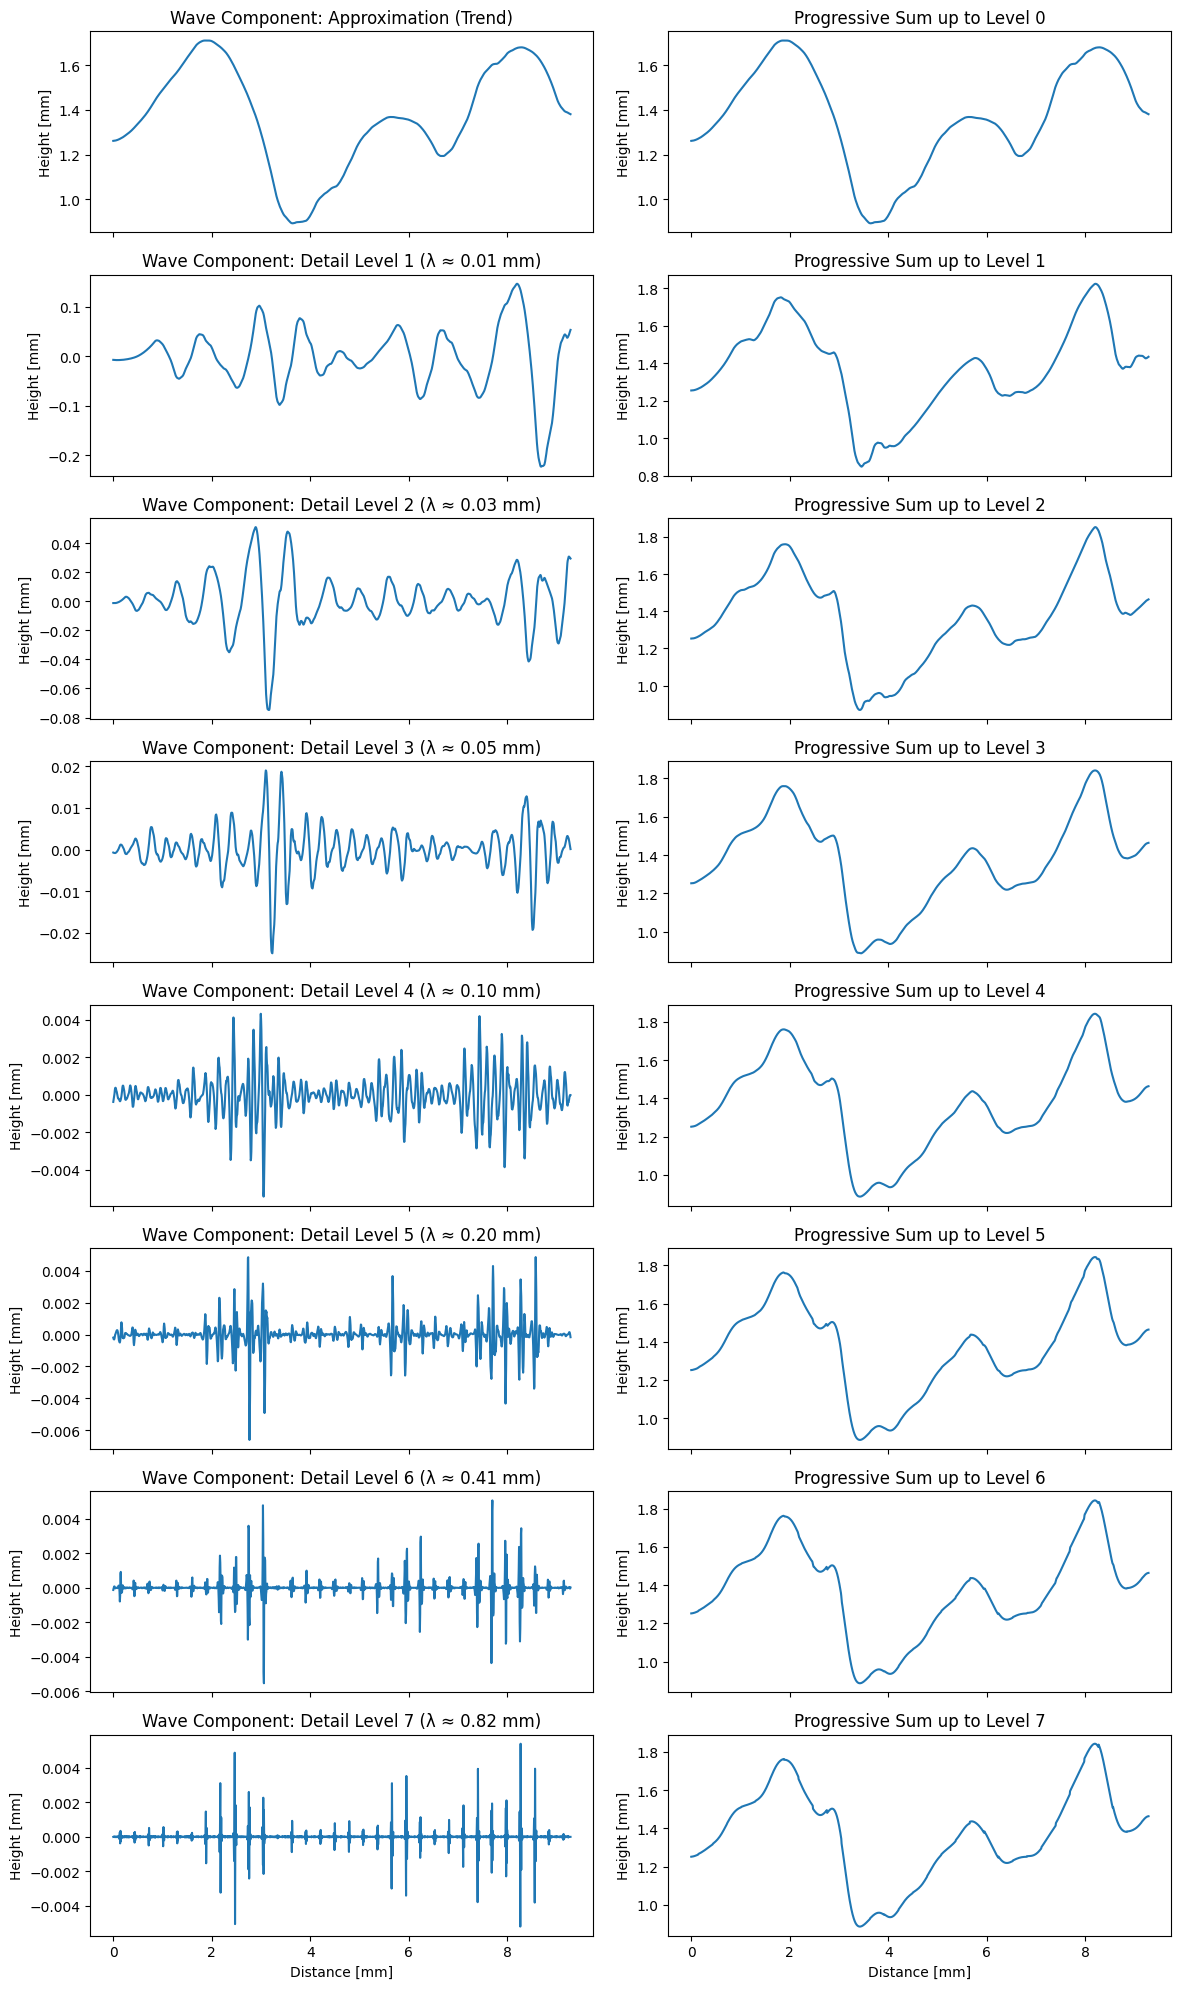

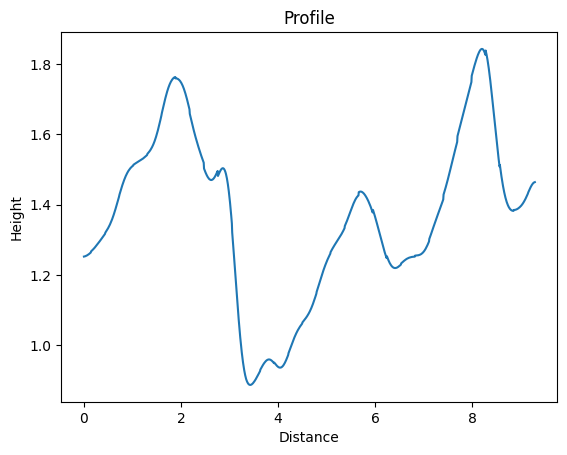

In [29]:

# Perform wavelet decomposition
wavelet = 'db4'
max_level = pywt.dwt_max_level(len(y), pywt.Wavelet(wavelet).dec_len)
coeffs = pywt.wavedec(y, wavelet=wavelet, level=max_level)

# Reconstruct each component (detail and approximation)
components = []
labels = []

for i in range(len(coeffs)):
    blank = [np.zeros_like(c) for c in coeffs]
    blank[i] = coeffs[i]
    reconstructed = pywt.waverec(blank, wavelet=wavelet)[:len(y)]
    components.append(reconstructed)
    if i == 0:
        labels.append("Approximation (Trend)")
    else:
        wavelength = 2**i * dx
        labels.append(f"Detail Level {i} (λ ≈ {wavelength:.2f} mm)")

# Progressive sum
progressive_sum = np.cumsum(components, axis=0)

# Plot all components
n = len(components)
fig, axs = plt.subplots(n, 2, figsize=(12, 2.5 * n), sharex=True)

for i in range(n):
    axs[i, 0].plot(x, components[i])
    axs[i, 0].set_title(f"Wave Component: {labels[i]}")
    axs[i, 0].set_ylabel("Height [mm]")
    
    axs[i, 1].plot(x, progressive_sum[i])
    axs[i, 1].set_title(f"Progressive Sum up to Level {i}")
    axs[i, 1].set_ylabel("Height [mm]")

for ax in axs[-1, :]:
    ax.set_xlabel("Distance [mm]")

plt.tight_layout()
plt.show()

profile = df.iloc[:, :2]

plt.plot(profile['Distance 1'], df['Height 1'])
plt.title("Profile")
plt.xlabel("Distance")
plt.ylabel("Height")
plt.show()


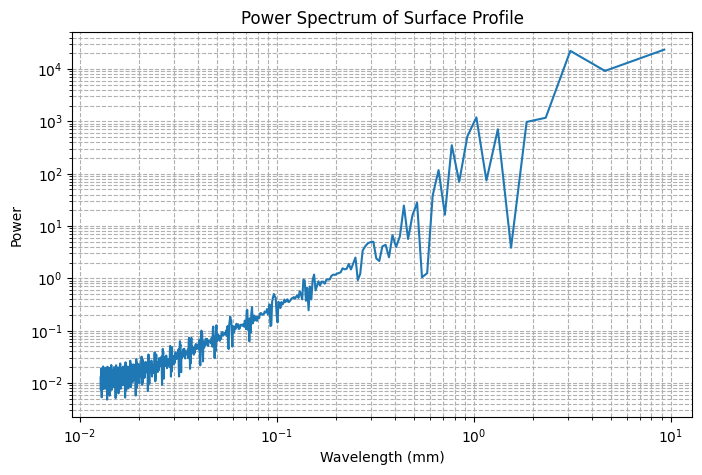

In [30]:
from scipy.interpolate import UnivariateSpline
spline = UnivariateSpline(
x, y, s=.001)
y_smooth = x

Y = np.fft.fft(y)
freqs = np.fft.fftfreq(len(y), d=dx)  # cycles per mm
PSD = np.abs(Y)**2
wavelengths = 1 / np.abs(freqs[1:len(freqs)//2])  # avoid zero freq
power = PSD[1:len(freqs)//2]
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(wavelengths, power)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength (mm)')
plt.ylabel('Power')
plt.title('Power Spectrum of Surface Profile')
plt.grid(True, which='both', linestyle='--')
plt.show()


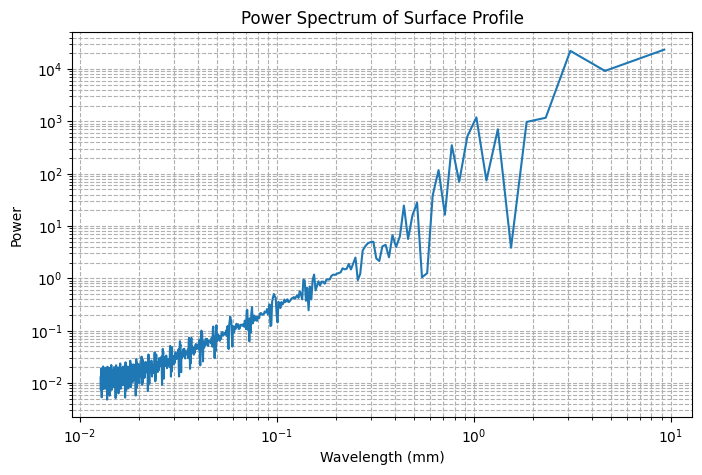

In [32]:
from scipy.interpolate import UnivariateSpline
spline = UnivariateSpline(
x, y, s=.01)
y_smooth = x

Y = np.fft.fft(y)
freqs = np.fft.fftfreq(len(y), d=dx)  # cycles per mm
PSD = np.abs(Y)**2
wavelengths = 1 / np.abs(freqs[1:len(freqs)//2])  # avoid zero freq
power = PSD[1:len(freqs)//2]
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(wavelengths, power)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength (mm)')
plt.ylabel('Power')
plt.title('Power Spectrum of Surface Profile')
plt.grid(True, which='both', linestyle='--')
plt.show()


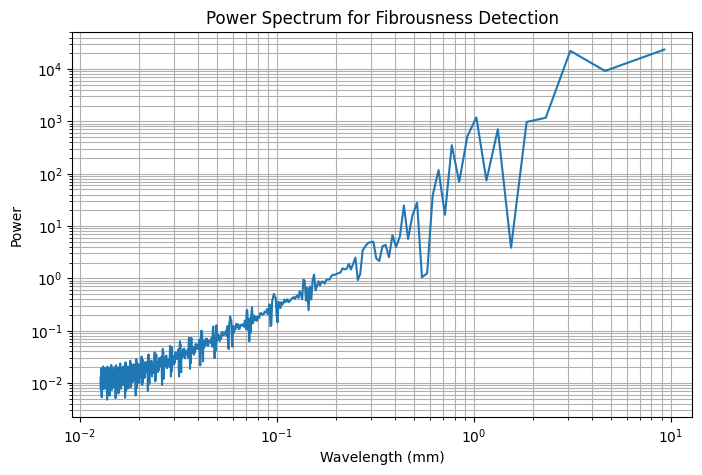

In [33]:
Y = np.fft.fft(y)
freqs = np.fft.fftfreq(len(y), d=dx)

power = np.abs(Y)**2
positive_freqs = freqs[freqs > 0]
positive_power = power[freqs > 0]

wavelengths = 1 / positive_freqs

plt.figure(figsize=(8,5))
plt.plot(wavelengths, positive_power)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength (mm)')
plt.ylabel('Power')
plt.title('Power Spectrum for Fibrousness Detection')
plt.grid(True, which='both')
plt.show()


In [44]:
np.percentile(power, 99.5)
np.where(power >= threshold, Y, 0)


array([1996.04445242  +0.j        ,  153.25023555  +3.49481357j,
        -87.65835091 -38.95791137j, ...,  -73.81256835-129.60039537j,
        -87.65835091 +38.95791137j,  153.25023555  -3.49481357j],
      shape=(1458,))

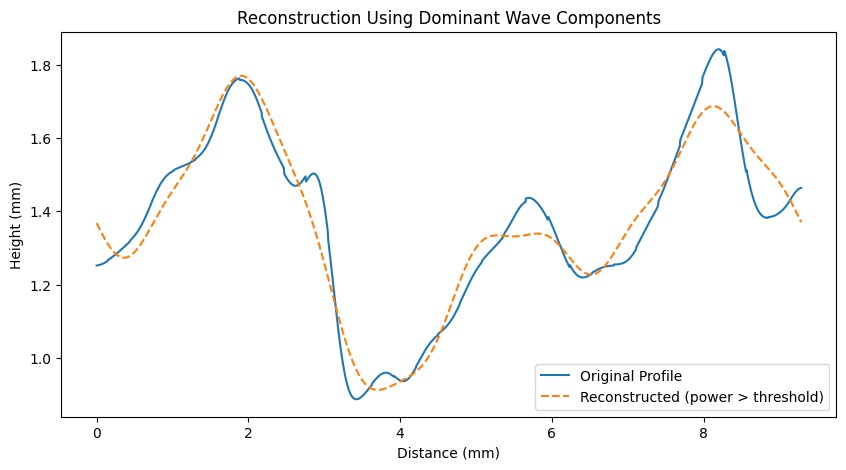

In [38]:
threshold = np.percentile(power, 99.5)

# Filter: keep coefficients with power above threshold, zero others
Y_filtered = np.where(power >= threshold, Y, 0)

# Inverse FFT to reconstruct signal from strong components only
y_reconstructed = np.fft.ifft(Y_filtered).real

# Plot original and reconstructed profiles
plt.figure(figsize=(10,5))
plt.plot(x, y, label='Original Profile')
plt.plot(x, y_reconstructed, label='Reconstructed (power > threshold)', linestyle='--')
plt.xlabel('Distance (mm)')
plt.ylabel('Height (mm)')
plt.legend()
plt.title('Reconstruction Using Dominant Wave Components')
plt.show()


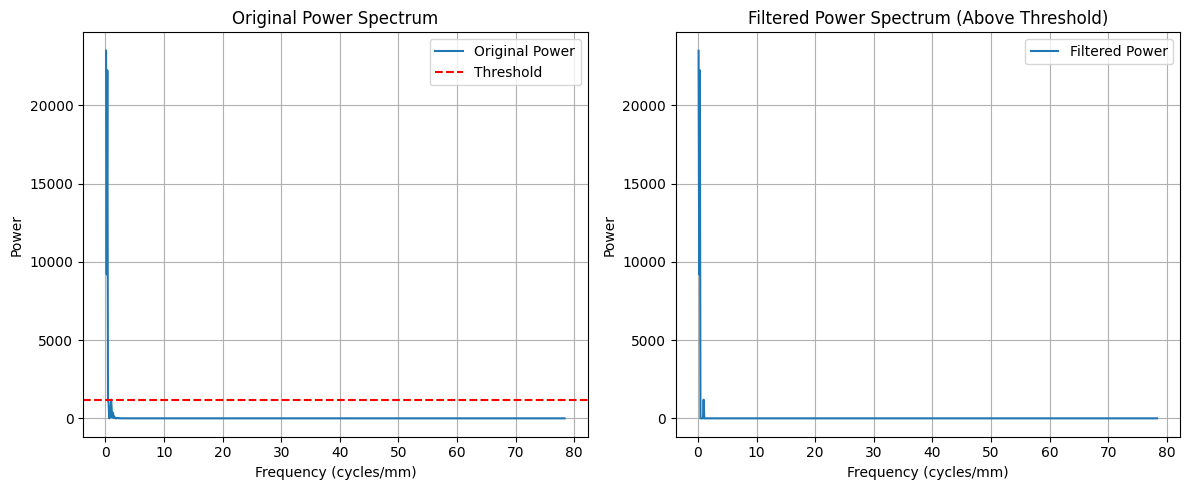

In [40]:
Y_filtered = np.where(power >= threshold, Y, 0)
power_filtered = np.abs(Y_filtered)**2

# Plot only positive frequencies
pos_mask = freqs > 0
freqs_pos = freqs[pos_mask]
power_pos = power[pos_mask]
power_filtered_pos = power_filtered[pos_mask]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(freqs_pos, power_pos, label='Original Power')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Frequency (cycles/mm)')
plt.ylabel('Power')
plt.title('Original Power Spectrum')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(freqs_pos, power_filtered_pos, label='Filtered Power')
plt.xlabel('Frequency (cycles/mm)')
plt.ylabel('Power')
plt.title('Filtered Power Spectrum (Above Threshold)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
